In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!cp "/content/emotion-dataset.zip" "/content/drive/MyDrive"

In [1]:
# Libraries
!pip install tensorflow_io==0.17.1
!pip install tensorflow==2.4.0
!sudo apt-get install -y python-pydub
!pip install pydub
import os
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile

In [2]:
# Loading the Audio WAV Files
def load_wav_16k_mono(filename):
  file_contents = tf.io.read_file(filename)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [3]:
# Loading all the File Paths
import glob
angry = glob.glob("Emotions Dataset/Angry/*.wav")
disgusted = glob.glob("Emotions Dataset/Disgusted/*.wav")
fearful = glob.glob("Emotions Dataset/Fearful/*.wav")
happy = glob.glob("Emotions Dataset/Happy/*.wav")
neutral = glob.glob("Emotions Dataset/Neutral/*.wav")
sad = glob.glob("Emotions Dataset/Sad/*.wav")
suprised = glob.glob("Emotions Dataset/Suprised/*.wav")

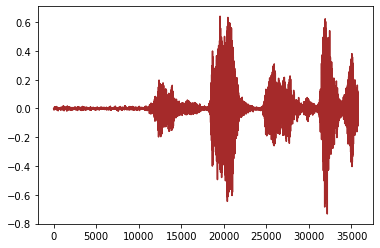

In [5]:
# Angry
angry_wav = load_wav_16k_mono(angry[16])
plt.plot(angry_wav, color="brown")
plt.show()

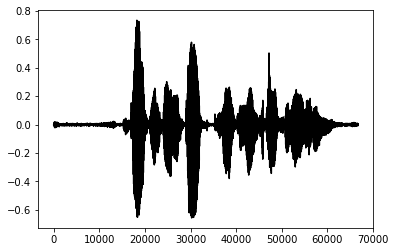

In [6]:
# Happy
happy_wav = load_wav_16k_mono(happy[16])
plt.plot(happy_wav, color="black")
plt.show()

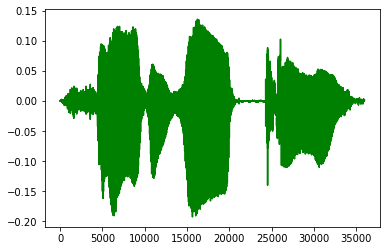

In [7]:
# Sad
sad_wav = load_wav_16k_mono(sad[16])
plt.plot(sad_wav, color="g")
plt.show()

In [8]:
# Removing Corrupted WAV Files
angry_files = []
happy_files = []
sad_files = []
neutral_files = []
disgusted_files = []
suprised_files = []
fearful_files = []

for i in range(len(angry)):
  try:
    file_contents = tf.io.read_file(angry[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    angry_files.append(angry[i])
  except:
    pass

for i in range(len(happy)):
  try:
    file_contents = tf.io.read_file(happy[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    happy_files.append(happy[i])
  except:
    pass

for i in range(len(neutral)):
  try:
    file_contents = tf.io.read_file(neutral[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    neutral_files.append(neutral[i])
  except:
    pass

for i in range(len(sad)):
  try:
    file_contents = tf.io.read_file(sad[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    sad_files.append(sad[i])
  except:
    pass

for i in range(len(suprised)):
  try:
    file_contents = tf.io.read_file(suprised[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    suprised_files.append(suprised[i])
  except:
    pass

for i in range(len(disgusted)):
  try:
    file_contents = tf.io.read_file(disgusted[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    disgusted_files.append(disgusted[i])
  except:
    pass

for i in range(len(fearful)):
  try:
    file_contents = tf.io.read_file(fearful[i])
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    fearful_files.append(fearful[i])
  except:
    pass

print(f"Sad: {len(sad_files)}")
print(f"Happy: {len(happy_files)}")
print(f"Angry: {len(angry_files)}")
print(f"Fearful: {len(fearful_files)}")
print(f"Suprised: {len(happy_files)}")
print(f"Neutral: {len(neutral_files)}")
print(f"Disgusted: {len(disgusted_files)}")

Sad: 2087
Happy: 2076
Angry: 2124
Fearful: 1946
Suprised: 2076
Neutral: 1872
Disgusted: 1813


In [9]:
# Loading Paths to make Tensorflow Dataset
SAD = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(sad_files))
HAPPY = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(happy_files))
ANGRY = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(angry_files))
NEUTRAL = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(neutral_files))
DISGUSTED = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(disgusted_files))
SUPRISED = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(suprised_files))
FEARFUL = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(fearful_files))

In [10]:
# Labels aka Targets
labels = ["SAD", "HAPPY", "ANGRY", "NEUTRAL", "DISGUSTED", "SUPRISED", "FEARFUL"]
ys_labels = [0, 1, 2, 3, 4, 5, 6]
ys_labels = tf.keras.utils.to_categorical(ys_labels)
print(ys_labels)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [11]:
# TF Dataset Loaders
sad_loader = tf.data.Dataset.zip((SAD, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[0] for _ in range(len(SAD))]))))
happy_loader = tf.data.Dataset.zip((HAPPY, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[1] for _ in range(len(HAPPY))]))))
angry_loader = tf.data.Dataset.zip((ANGRY, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[2] for _ in range(len(ANGRY))]))))
neutral_loader = tf.data.Dataset.zip((NEUTRAL, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[3] for _ in range(len(NEUTRAL))]))))
disgusted_loader = tf.data.Dataset.zip((DISGUSTED, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[4] for _ in range(len(DISGUSTED))]))))
suprised_loader = tf.data.Dataset.zip((SUPRISED, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[5] for _ in range(len(SUPRISED))]))))
fearful_loader = tf.data.Dataset.zip((FEARFUL, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor([ys_labels[6] for _ in range(len(FEARFUL))]))))

In [12]:
# Function that generates the spectrograms of the WAV
def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:49000]
  zero_padding = tf.zeros([49000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=-1)
  return spectrogram, label

Shape is: (1522, 257, 1)
Label: [0. 0. 1. 0. 0. 0. 0.]
---------------- Angry Spectrogram -----------------


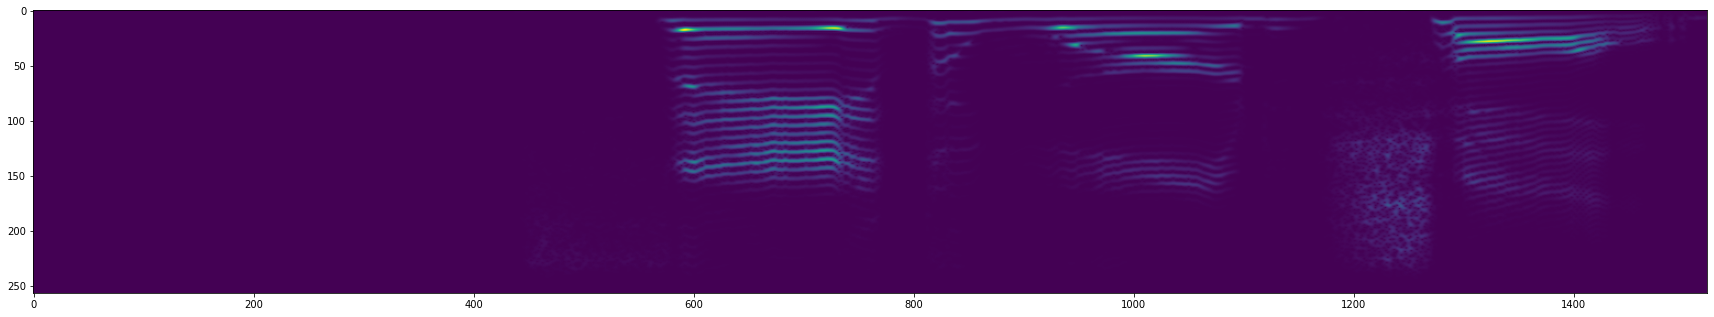

In [13]:
filepath_angry, label = angry_loader.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath_angry, label)
print(f"Shape is: {spectrogram.shape}")
print(f"Label: {label}")
print("---------------- Angry Spectrogram -----------------")
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

Shape is: (1522, 257, 1)
Label: [0. 1. 0. 0. 0. 0. 0.]
---------------- Happy Spectrogram -----------------


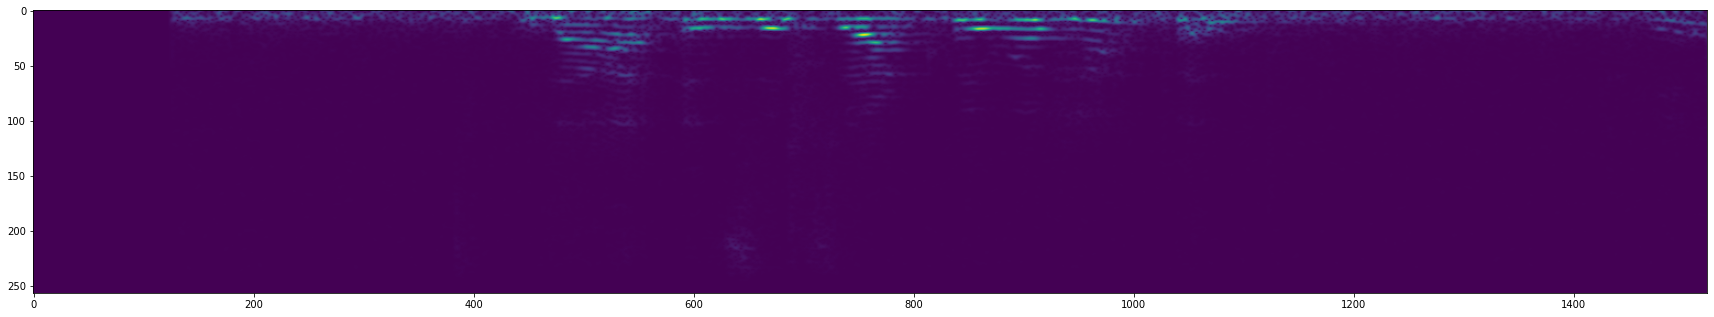

In [14]:
filepath_happy, label = happy_loader.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath_happy, label)
print(f"Shape is: {spectrogram.shape}")
print(f"Label: {label}")
print("---------------- Happy Spectrogram -----------------")
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [15]:
# Dataset Pipeling for training 
dataset = angry_loader.concatenate(sad_loader)
dataset = dataset.concatenate(happy_loader)
dataset = dataset.concatenate(neutral_loader)
dataset = dataset.concatenate(disgusted_loader)
dataset = dataset.concatenate(suprised_loader)
dataset = dataset.concatenate(fearful_loader)
print(f"Total Records: {len(dataset)}")
dataset = dataset.map(preprocess)
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.batch(8)
dataset = dataset.prefetch(2)

Total Records: 12488


In [16]:
len(dataset)*.7, len(dataset)*.3

(1092.6999999999998, 468.29999999999995)

In [17]:
train = dataset.take(100)
test = dataset.skip(100).take(10)

In [23]:
# Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(1522, 257, 1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(len(ys_labels), activation="softmax"))

In [24]:
# Compiling
model.compile(
    optimizer="Adam",
    loss="CategoricalCrossentropy",
    metrics=[
             tf.keras.metrics.Recall(),
             tf.keras.metrics.Precision()
    ]
)

In [25]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1520, 255, 16)     160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 760, 127, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 758, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 379, 62, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 377, 60, 32)       9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 188, 30, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 186, 28, 64)      

In [26]:
# Callbacks
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

In [ ]:
history = model.fit(train, epochs=5, validation_data=test, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

In [ ]:
md = tf.keras.models.load_model("/content/model.hdf5")

In [ ]:
md.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1520, 255, 16)     160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 760, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 758, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 379, 62, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 377, 60, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 188, 30, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 186, 28, 64)       1

In [ ]:
x_test, y_test = test.as_numpy_iterator().next()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test, y_pred

(array([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]], dtype=float32))

In [ ]:
y_test == y_pred

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])